In [1]:
import pandas as pd
import numpy as np
from pymoo.indicators.hv import Hypervolume
import matplotlib.pyplot as plt
import seaborn as sns
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Get all the data

In [2]:
# Load the data

data = pd.DataFrame()
iteration = 4

for i in range(iteration+1):

    file_path = "ACE/iteration_" + str(i) + "/data/labeled_" + str(i) + ".xlsx"
    data_iter = pd.read_excel(file_path, engine="openpyxl")
    data_iter['iteration'] = i
    data = pd.concat([data, data_iter])

data = data.reset_index(drop=True)
data['Theoretical loading'] = data['Drug'] * data['Formulation Quality']
data['Theoretical loading_STD'] = 0
data.to_csv("aggregated_data.csv", index=False)
data

,trial_index,Drug,SL_1,SL_2,SL_3,LL_1,LL_2,LL_3,P_1,P_2,...,Size,Size_STD,PDI,PDI_STD,Formulation Quality,Solu,Solu_STD,iteration,Theoretical loading,Theoretical loading_STD
0,0,0.096,0.120,0.100,0.064,0.192,0.016,0.020,0.068,0.170,...,1000.000000,0.000000,1.000000,0.000000,0,0.0,0,0,0.000,0
1,1,0.167,0.068,0.090,0.151,0.090,0.117,0.140,0.095,0.047,...,1000.000000,0.000000,1.000000,0.000000,0,0.0,0,0,0.000,0
2,2,0.119,0.180,0.030,0.056,0.047,0.220,0.063,0.215,0.005,...,269.265531,10.582329,0.272514,0.042610,1,238.0,0,0,0.119,0
3,3,0.017,0.037,0.171,0.141,0.141,0.070,0.116,0.039,0.122,...,230.770418,4.715827,0.397357,0.052035,1,34.0,0,0,0.017,0
4,4,0.049,0.196,0.158,0.112,0.112,0.051,0.103,0.162,0.046,...,289.427392,18.167266,0.388666,0.042201,1,98.0,0,0,0.049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,23.446451,1.058113,0.201713,0.026201,1,2000.0,0,4,1.000,0
76,76,0.862,0.138,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1000.000000,0.000000,1.000000,0.000000,0,0.0,0,4,0.000,0
77,77,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,22.899040,0.187142,0.113366,0.017995,1,2000.0,0,4,1.000,0
78,78,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1000.000000,0.000000,1.000000,0.000000,0,0.0,0,4,0.000,0


In [3]:
# Data normalization

data_norm = data.copy()
data_norm['Size'] = data_norm['Size'] / 1000
data_norm['Size_STD'] = data_norm['Size_STD'] / 1000


data_norm['Complexity'] = data_norm['Complexity'] / 12
data_norm

,trial_index,Drug,SL_1,SL_2,SL_3,LL_1,LL_2,LL_3,P_1,P_2,...,Size,Size_STD,PDI,PDI_STD,Formulation Quality,Solu,Solu_STD,iteration,Theoretical loading,Theoretical loading_STD
0,0,0.096,0.120,0.100,0.064,0.192,0.016,0.020,0.068,0.170,...,1.000000,0.000000,1.000000,0.000000,0,0.0,0,0,0.000,0
1,1,0.167,0.068,0.090,0.151,0.090,0.117,0.140,0.095,0.047,...,1.000000,0.000000,1.000000,0.000000,0,0.0,0,0,0.000,0
2,2,0.119,0.180,0.030,0.056,0.047,0.220,0.063,0.215,0.005,...,0.269266,0.010582,0.272514,0.042610,1,238.0,0,0,0.119,0
3,3,0.017,0.037,0.171,0.141,0.141,0.070,0.116,0.039,0.122,...,0.230770,0.004716,0.397357,0.052035,1,34.0,0,0,0.017,0
4,4,0.049,0.196,0.158,0.112,0.112,0.051,0.103,0.162,0.046,...,0.289427,0.018167,0.388666,0.042201,1,98.0,0,0,0.049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.023446,0.001058,0.201713,0.026201,1,2000.0,0,4,1.000,0
76,76,0.862,0.138,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000000,0.000000,1.000000,0.000000,0,0.0,0,4,0.000,0
77,77,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.022899,0.000187,0.113366,0.017995,1,2000.0,0,4,1.000,0
78,78,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000000,0.000000,1.000000,0.000000,0,0.0,0,4,0.000,0


In [21]:
data_norm[component_cols + objectives].to_csv("data_norm.csv", index=False)

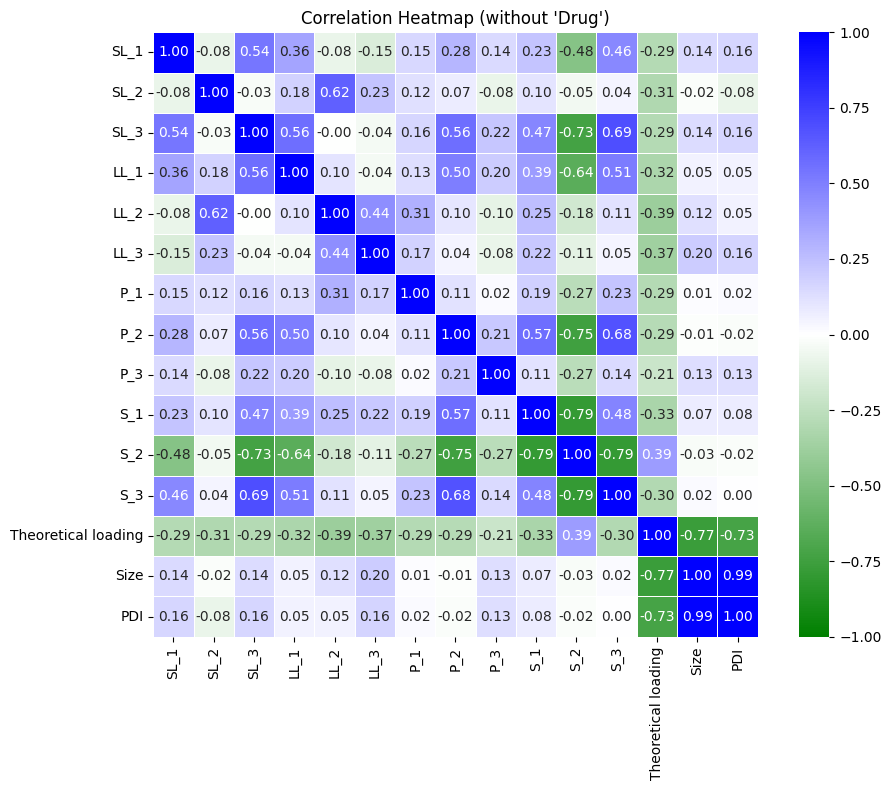

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. 从 component_cols + objectives 中去掉 'Drug'
cols = [c for c in component_cols + objectives if c != 'Drug']

# 2. 计算相关矩阵
corr = data_norm[cols].corr()

# 3. 自定义 colormap：-1（绿色）→0（白色）→+1（蓝色）
cmap = LinearSegmentedColormap.from_list(
    "green_white_blue",
    ["green", "white", "blue"]
)

# 4. 绘制热力图，中心对齐 0，范围固定在 [-1, 1]
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,      # 如果想在格子里显示数值，可以保留这一行
    fmt=".2f",       # 数值格式
    square=True,     # 保持格子为正方形
    linewidths=.5    # 格子间隔线宽
)
plt.title("Correlation Heatmap (without 'Drug')")
plt.tight_layout()
plt.show()


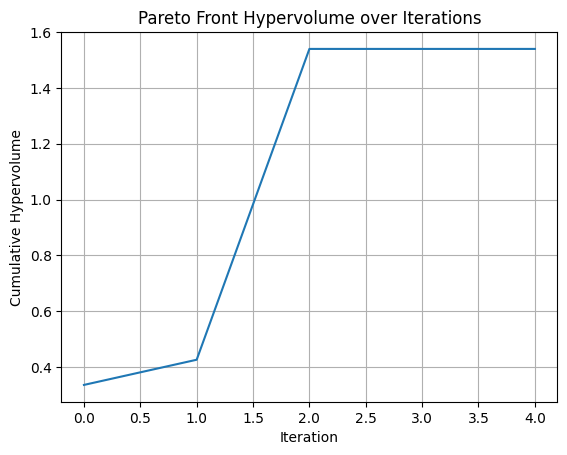

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ====== Hypervolume 计算函数 ======
def hv_2d(pts, ref):
    pts_sorted = sorted(pts, key=lambda p: p[0])
    hv = 0.0
    prev_x = ref[0]
    min_y = float('inf')
    for x, y in pts_sorted:
        if y < min_y:
            width = prev_x - x
            height = ref[1] - y
            if width > 0 and height > 0:
                hv += width * height
            min_y = y
            prev_x = x
    return hv

def hv_3d(pts, ref):
    pts_sorted = sorted(pts, key=lambda p: p[0])
    hv = 0.0
    prev_x = ref[0]
    for i in range(len(pts_sorted)):
        x1 = pts_sorted[i][0]
        width = prev_x - x1
        if width <= 0:
            prev_x = x1
            continue
        slice_pts = [p[1:] for p in pts_sorted[:i+1]]
        area2 = hv_2d(slice_pts, ref[1:])
        hv += width * area2
        prev_x = x1
    return hv

# ====== 计算累积超体积并绘制 ======
df = data_norm.copy()
df['loading_min'] = -df['Theoretical loading']  # loading 越大越好

objectives = ['loading_min', 'Size', 'PDI']
ref_point = [0.2, 1.2, 1.2]

iterations = sorted(df['iteration'].unique())
hv_cum = []
for t in iterations:
    subset = df[df['iteration'] <= t]
    pts = subset[objectives].values.tolist()
    hv_cum.append(hv_3d(pts, ref_point))

plt.figure()
plt.plot(iterations, hv_cum)
plt.xlabel('Iteration')
plt.ylabel('Cumulative Hypervolume')
plt.title('Pareto Front Hypervolume over Iterations')
plt.grid(True)
plt.show()


In [8]:
organic_phase = ['Drug','SL_1', 'SL_2', 'SL_3', 'LL_1', 'LL_2', 'LL_3', 'P_1', 'P_2', 'P_3']
aqueous_phase = ['S_1', 'S_2', 'S_3']
component_cols = organic_phase + aqueous_phase
objectives = ['Theoretical loading', 'Size', 'PDI']
maximize_flags = [True, False, False]

In [9]:
from ax.service.ax_client import AxClient


path = '/Users/zeqing/0_Github/SDL5_Nano/1st_round_screening/ACE/iteration_4/optimizer/optimizer_load_4.json'
ax_client = AxClient.load_from_json_file(path)

In [10]:
ax_client.get_trials_data_frame()

,trial_index,arm_name,trial_status,generation_node,Solu,Size,PDI,Drug,SL_1,SL_2,...,LL_1,LL_2,LL_3,P_1,P_2,P_3,S_1,S_2,S_3,Water
0,0,0_0,COMPLETED,GenerationStep_0,0.000,1.000000,1.000000,48,60,50,...,96,8,10,34,85,76,89,88,81,85
1,1,1_0,COMPLETED,GenerationStep_0,0.000,1.000000,1.000000,93,38,50,...,50,65,78,53,26,20,36,4,29,0
2,2,2_0,COMPLETED,GenerationStep_0,0.119,0.269266,0.272514,51,77,13,...,20,94,27,92,2,28,16,30,59,53
3,3,3_0,COMPLETED,GenerationStep_0,0.017,0.230770,0.397357,9,19,88,...,73,36,60,20,63,75,58,63,11,37
4,4,4_0,COMPLETED,GenerationStep_0,0.049,0.289427,0.388666,23,93,75,...,53,24,49,77,22,5,8,56,71,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,75_0,COMPLETED,GenerationStep_1,1.000,0.023446,0.201713,49,0,0,...,0,0,0,0,0,0,0,91,0,0
76,76,76_0,COMPLETED,GenerationStep_1,0.000,1.000000,1.000000,50,8,0,...,0,0,0,0,0,0,0,100,0,0
77,77,77_0,COMPLETED,GenerationStep_1,1.000,0.022899,0.113366,67,0,0,...,0,0,0,0,0,0,0,96,0,0
78,78,74_0,COMPLETED,GenerationStep_1,0.000,1.000000,1.000000,50,0,0,...,0,0,0,0,0,0,0,91,0,0


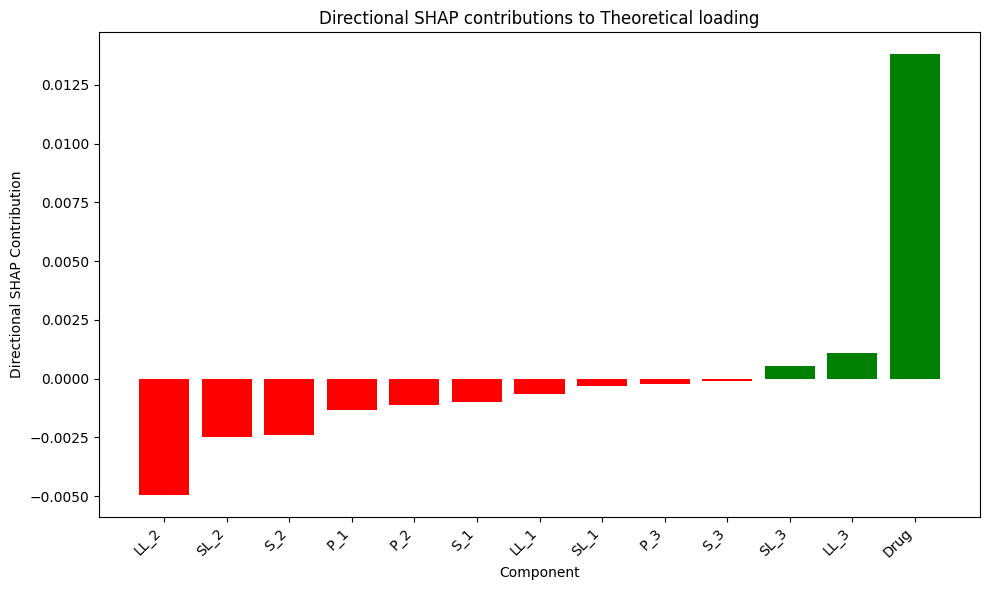

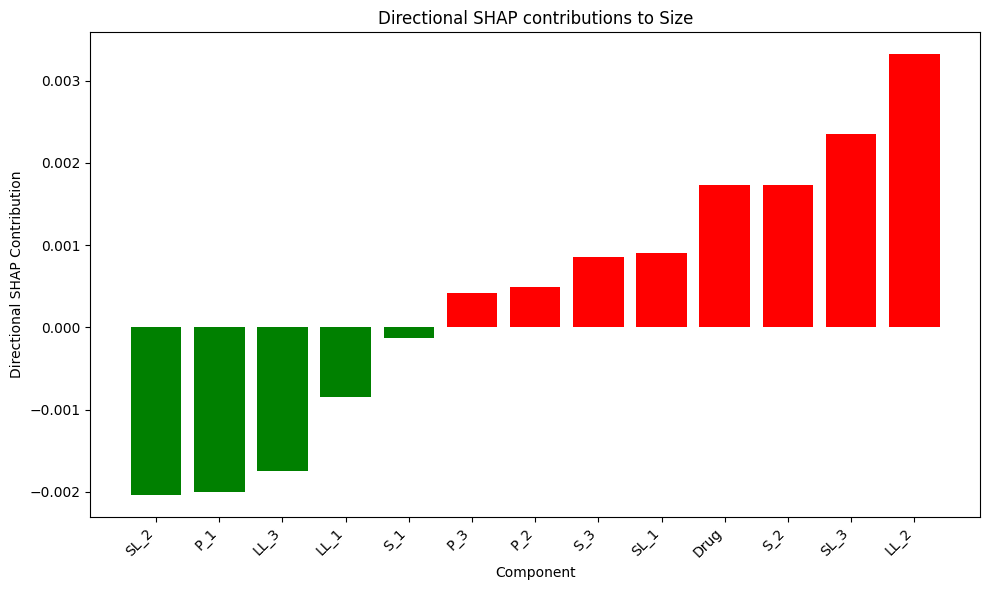

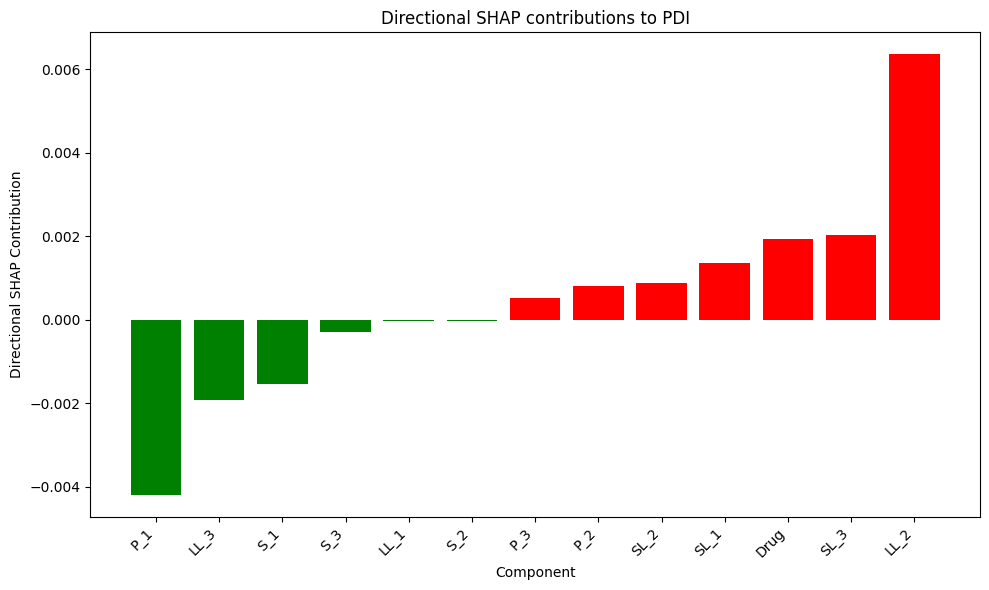

Components beneficial for all objectives:
- LL_3


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import shap

# 如果使用 AxClient，需要导入 torch
import torch
from ax.service.ax_client import AxClient

def analyze_directional_shap_all(
    df,
    component_cols,
    objectives,
    maximize_flags,
    random_state=0,
    ax_client=None,
    gp_model=None
):
    """
    基于 SHAP 值计算所有组分对各目标的方向性贡献，并统一绘制柱状图。

    支持三种模式：
      1. 默认：使用 RandomForestRegressor 训练并计算 SHAP（TreeExplainer）。
      2. 若提供 ax_client（AxClient 实例）：尝试提取其内部 GP surrogate 并使用 KernelExplainer。
      3. 若提供 gp_model（BoTorch GPModel）：直接使用该模型的 posterior 方法与 KernelExplainer。

    参数:
        df (pd.DataFrame): 包含组分和目标列的数据集。
        component_cols (list[str]): 所有组分列名列表（有机相 + 水相）。
        objectives (list[str]): 目标列名列表。
        maximize_flags (list[bool]): 与 objectives 一一对应，True 表示目标越大越好，False 表示目标越小越好。
        random_state (int): 随机种子。
        ax_client (AxClient, optional): 已训练好的 AxClient 实例，会尝试提取内部 GP surrogate。
        gp_model (botorch.models.model.GP, optional): 已训练好的 BoTorch GP 模型实例，直接用于 SHAP。

    返回:
        dict: {objective: pd.Series}，Series 索引为组分，值为方向性贡献大小。
    """
    contributions = {}
    X = df[component_cols].values
    X_df = df[component_cols]
    all_beneficial = set(component_cols)

    # 背景样本用于 KernelExplainer
    background = X_df.sample(n=min(100, len(X_df)), random_state=random_state).values

    # 定义一个函数，用于获取 GPModel 的 posterior
    def make_predict_fn(model):
        def predict_fn(x_array):
            x_tensor = torch.from_numpy(x_array.astype(np.float32))
            post = model.posterior(x_tensor)
            mean = post.mean.squeeze(-1).detach().numpy()
            return mean
        return predict_fn

    for obj, maximize in zip(objectives, maximize_flags):
        y = df[obj].values

        # 决定使用何种模型
        if gp_model is not None:
            # 直接使用传入的 BoTorch GPModel
            predict_fn = make_predict_fn(gp_model)
            explainer = shap.KernelExplainer(predict_fn, background)
            shap_vals = explainer.shap_values(X)
        elif ax_client is not None:
            # 尝试从 AxClient 提取 gp_model
            surrogate = None
            try:
                # Common locations
                surrogate = getattr(ax_client.generation_strategy, '_model', None)
            except Exception:
                surrogate = None
            if surrogate is None:
                surrogate = getattr(ax_client, '_surrogate_model', None)
            if surrogate is None and hasattr(ax_client, 'experiment'):
                surrogate = getattr(ax_client.experiment, 'surrogate', None)
            if surrogate is None:
                raise AttributeError(
                    "提取 GP surrogate 失败，请手动提供 gp_model 参数。"
                )
            # surrogate 可能是容器，需要含 posterior 方法
            if not hasattr(surrogate, 'posterior'):
                # 如果有 _model 属性，取其模型
                surrogate = getattr(surrogate, '_model', surrogate)
            if not hasattr(surrogate, 'posterior'):
                raise AttributeError(
                    f"提供的 surrogate 对象 {type(surrogate)} 不包含 posterior 方法，请检查。"
                )
            predict_fn = make_predict_fn(surrogate)
            explainer = shap.KernelExplainer(predict_fn, background)
            shap_vals = explainer.shap_values(X)
        else:
            # 默认随机森林方式
            model = RandomForestRegressor(random_state=random_state)
            model.fit(X, y)
            explainer = shap.TreeExplainer(model)
            shap_vals = explainer.shap_values(X)

        # 计算平均 SHAP 和方向性
        mean_shap = np.mean(shap_vals, axis=0)
        directional = mean_shap if maximize else -mean_shap
        series = pd.Series(directional, index=component_cols).sort_values()
        contributions[obj] = series

        # 判断益处并着色（绿=有益，红=不利）
        beneficial_mask = series > 0 if maximize else series < 0
        colors = ['green' if beneficial_mask[comp] else 'red' for comp in series.index]

        plt.figure(figsize=(10, 6))
        plt.bar(series.index, series.values, color=colors)
        plt.xlabel('Component')
        plt.ylabel('Directional SHAP Contribution')
        plt.title(f'Directional SHAP contributions to {obj}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # 更新在所有目标中均有益的组分
        beneficial = set(series[beneficial_mask].index)
        all_beneficial &= beneficial

    # 打印总结
    print('Components beneficial for all objectives:')
    if all_beneficial:
        for comp in sorted(all_beneficial):
            print('-', comp)
    else:
        print('None')

    return contributions

# 使用示例：
# 指定 gp_model:
# from ax.service.ax_client import AxClient
# ax_client = AxClient()
# ax_client.create_experiment(...)
# ax_client.maximize(...)
gp = getattr(ax_client.generation_strategy, '_model', None)
directional_contribs = analyze_directional_shap_all(
    df=data_norm,
    component_cols=component_cols,
    objectives=objectives,
    maximize_flags=maximize_flags,
    gp_model=gp
)


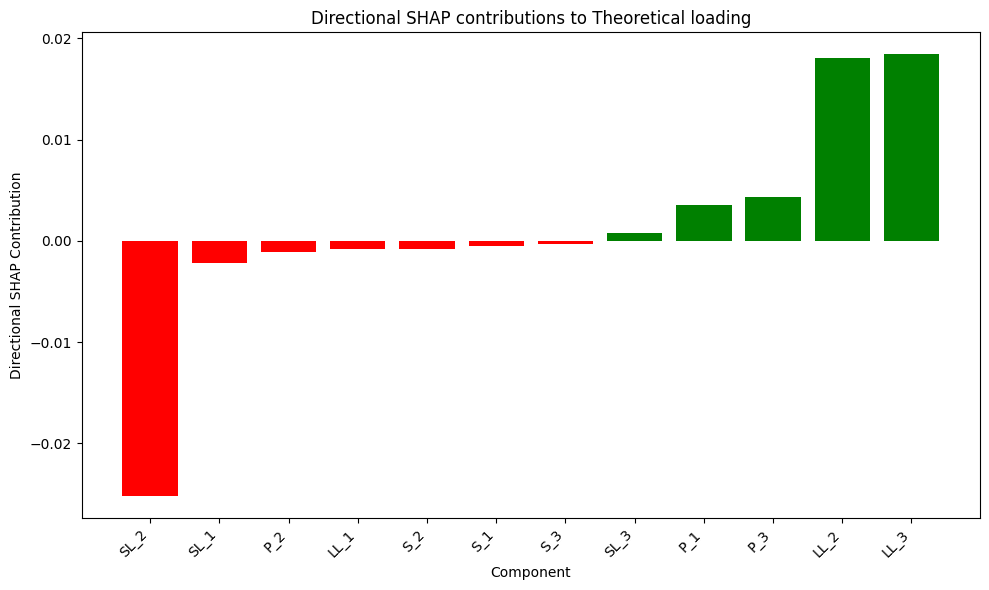

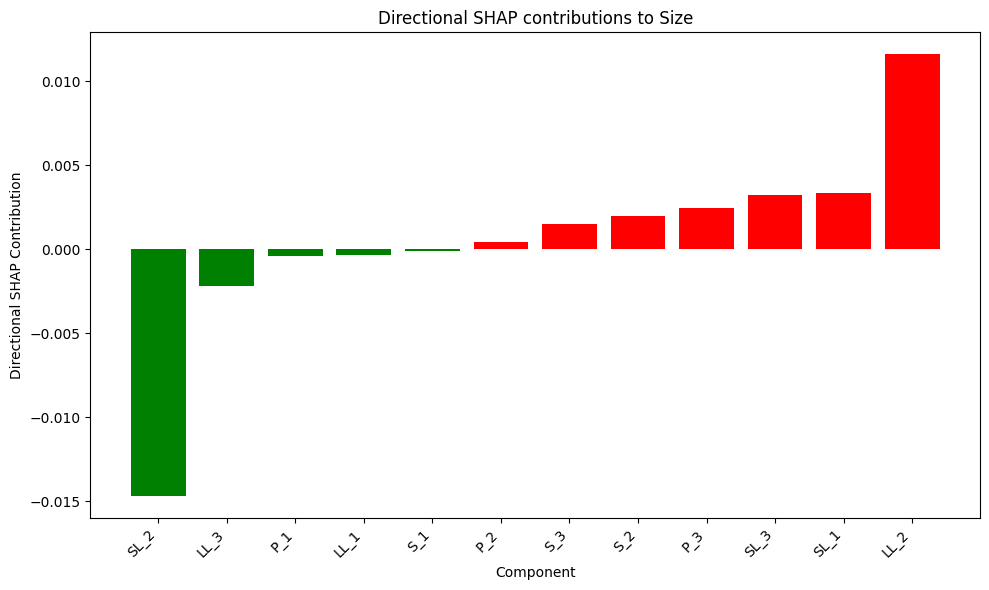

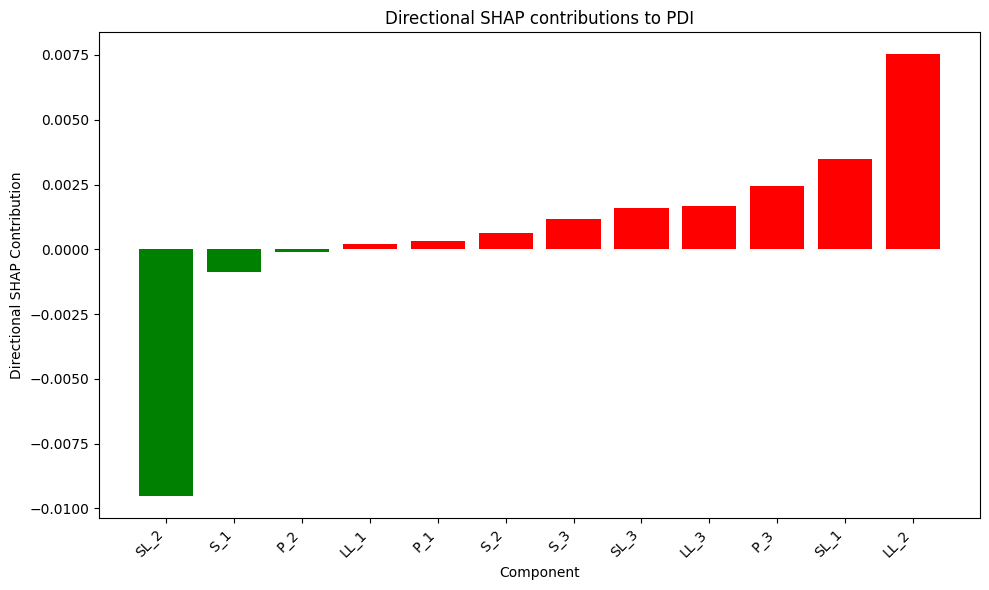

Components beneficial for all objectives:
None


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import shap

def analyze_directional_shap_all(df, component_cols, objectives, maximize_flags, random_state=0):
    """
    基于 SHAP 值计算所有组分对各目标的方向性贡献，并统一绘制柱状图。

    参数:
        df (pd.DataFrame): 包含组分和目标列的数据集。
        component_cols (list[str]): 所有组分列名列表（有机相 + 水相）。
        objectives (list[str]): 目标列名列表。
        maximize_flags (list[bool]): 与 objectives 一一对应，True 表示目标越大越好，False 表示目标越小越好。
        random_state (int): 随机种子，默认为 0。
    返回:
        dict: {objective: pd.Series}，Series 索引为组分，值为方向性贡献大小。
    """
    contributions = {}
    X = df[component_cols]
    # 用于记录所有目标中均有益的组分
    all_beneficial = set(component_cols)

    for obj, maximize in zip(objectives, maximize_flags):
        y = df[obj]
        # 训练模型
        model = RandomForestRegressor(random_state=random_state)
        model.fit(X, y)
        # 计算 SHAP 值
        explainer = shap.TreeExplainer(model)
        shap_vals = explainer.shap_values(X)
        # 平均 SHAP 值
        mean_shap = np.mean(shap_vals, axis=0)
        # 计算方向性贡献：对于 maximize=False，取相反数
        directional = mean_shap if maximize else -mean_shap
        series = pd.Series(directional, index=component_cols).sort_values()
        contributions[obj] = series

        # 根据 maximize_flags，用 directional 值判断益处：
        # maximize=True 时，directional>0 为有益；maximize=False 时，directional<0 为有益
        if maximize:
            beneficial_mask = series > 0
        else:
            beneficial_mask = series < 0

        # 着色：绿色表示有益，红色表示不利
        colors = ['green' if beneficial_mask[comp] else 'red' for comp in series.index]

        # 绘制柱状图
        plt.figure(figsize=(10, 6))
        plt.bar(series.index, series.values, color=colors)
        plt.xlabel('Component')
        plt.ylabel('Directional SHAP Contribution')
        plt.title(f'Directional SHAP contributions to {obj}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # 更新所有目标中都为有益的组分集合
        beneficial = set(series[beneficial_mask].index)
        all_beneficial &= beneficial

    # 打印在所有目标中均有益的组分
    print('Components beneficial for all objectives:')
    if all_beneficial:
        for comp in sorted(all_beneficial):
            print('-', comp)
    else:
        print('None')

    return contributions

# 使用示例
organic_phase = ['SL_1', 'SL_2', 'SL_3', 'LL_1', 'LL_2', 'LL_3', 'P_1', 'P_2', 'P_3']
aqueous_phase = ['S_1', 'S_2', 'S_3']
component_cols = organic_phase + aqueous_phase
objectives = ['Theoretical loading', 'Size', 'PDI']
maximize_flags = [True, False, False]
directional_contribs = analyze_directional_shap_all(data_norm, component_cols, objectives, maximize_flags)


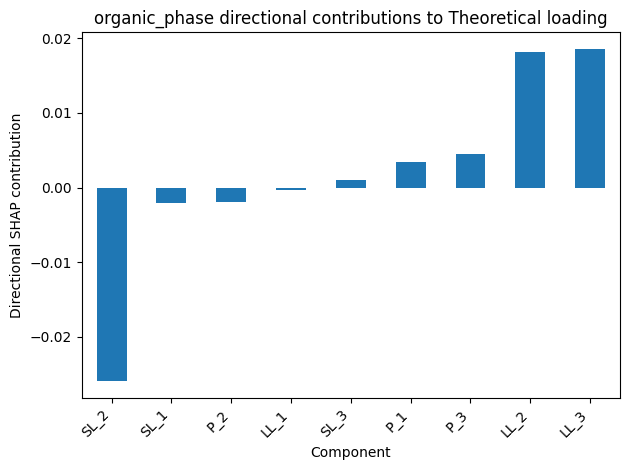

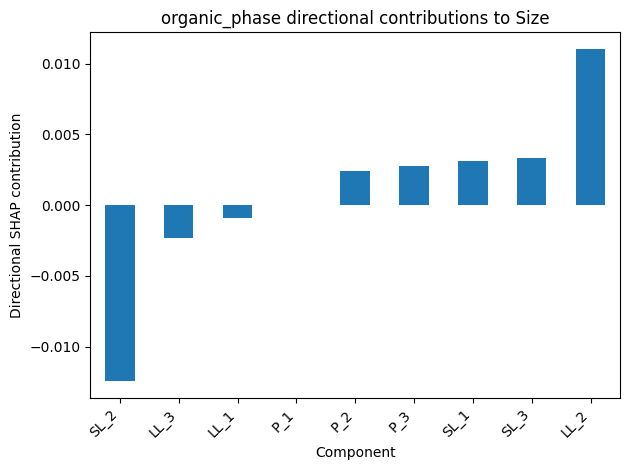

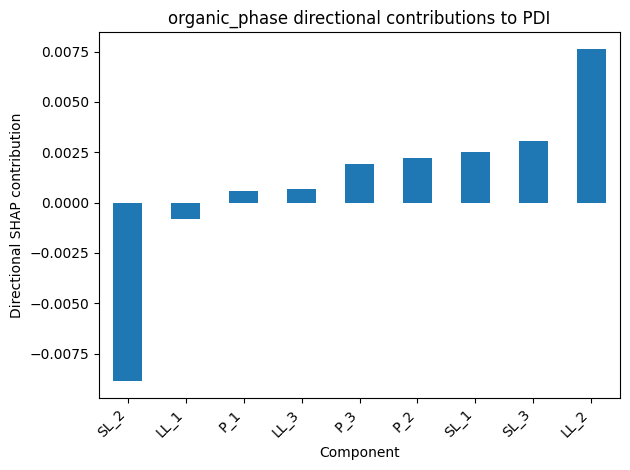

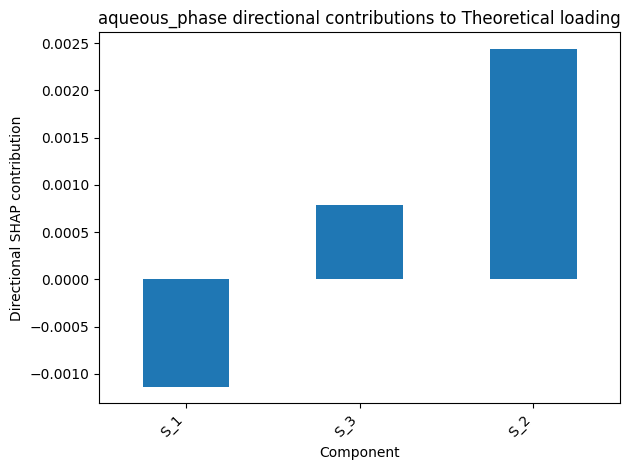

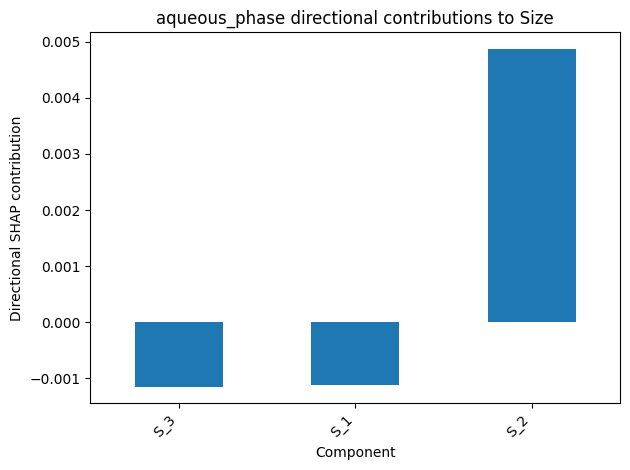

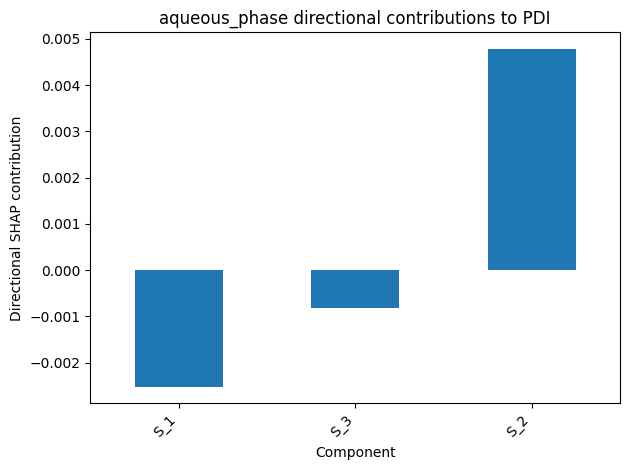

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import shap

def analyze_phase_directional_shap(df, organic_cols, aqueous_cols, objectives, maximize_flags, random_state=0):
    """
    基于 SHAP 值计算有机相和水相中各组分对目标的方向性贡献（正向有利，负向不利）。

    参数:
        df (pd.DataFrame): 包含组分和目标列的数据集。
        organic_cols (list[str]): 有机相组分列名。
        aqueous_cols (list[str]): 水相组分列名。
        objectives (list[str]): 目标列名。
        maximize_flags (list[bool]): 与 objectives 对应，True 表示目标越大越好，False 表示目标越小越好。
        random_state (int): 随机种子，默认为 0。
    
    返回:
        dict: {(phase_name, objective): pd.Series}，Series 索引为组分，值为方向性贡献大小。
    """
    contributions = {}
    for phase_name, cols in [('organic_phase', organic_cols), ('aqueous_phase', aqueous_cols)]:
        X = df[cols]
        for obj, maximize in zip(objectives, maximize_flags):
            y = df[obj]
            # 训练模型
            model = RandomForestRegressor(random_state=random_state)
            model.fit(X, y)
            # 计算 SHAP 值
            explainer = shap.TreeExplainer(model)
            shap_vals = explainer.shap_values(X)
            # 平均 SHAP 值（正负即方向）
            mean_shap = np.mean(shap_vals, axis=0)
            # 对于“越小越好”的目标，将 SHAP 反向以表示正向贡献
            directional = mean_shap if maximize else -mean_shap
            series = pd.Series(directional, index=cols).sort_values()
            contributions[(phase_name, obj)] = series
            # 绘图
            fig, ax = plt.subplots()
            series.plot.bar(ax=ax)
            ax.set_xlabel('Component')
            ax.set_ylabel('Directional SHAP contribution')
            ax.set_title(f'{phase_name} directional contributions to {obj}')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
    return contributions

# 使用示例（请替换为你的真实 df_norm 和列列表）
organic_phase = [ 'SL_1', 'SL_2', 'SL_3', 'LL_1', 'LL_2', 'LL_3', 'P_1', 'P_2', 'P_3']
aqueous_phase = [ 'S_1', 'S_2', 'S_3']
objectives = ['Theoretical loading', 'Size', 'PDI']
maximize_flags = [True, False, False]  # loading 越大越好；Size、PDI 越小越好
directional_contribs = analyze_phase_directional_shap(data_norm, organic_phase, aqueous_phase, objectives, maximize_flags)


In [4]:
# hypervolume and pareto front calculation

def hv(df_norm):
    
    data = df_norm.copy()


    data['Theoretical loading_min'] = -data['Theoretical loading']


    # Select relevant objectives for hypervolume calculation
    objectives = ['Theoretical loading_min',  'Size', 'PDI', 'Complexity']

    # Define the reference point (worst case + 20%)
    reference_point = [0.2, 1.2, 1.2, 1.2]

    hv_values = []

    for trial in sorted(data['trial_index']):
        formulation = data[data['trial_index'] == trial][objectives].values
        hv = Hypervolume(ref_point=reference_point)
        hv_values.append(hv.do(formulation))
        hv_values.append(trial)
    
    # Perform non-dominated sorting to determine Pareto front
    nds = NonDominatedSorting()
    pareto_fronts = nds.do(data[objectives].values)
    
    # Create a list to indicate Pareto front membership (1 for Pareto front, 0 otherwise)
    pareto_flags = [1 if i in pareto_fronts[0] else 0 for i in range(len(data))]

    return hv_values[::2], pareto_flags

In [5]:
# hypervolume and pareto front calculation

data['Hypervolume'], data['Pareto'] = hv(data_norm)   
data

,trial_index,Drug,SL_1,SL_2,SL_3,LL_1,LL_2,LL_3,P_1,P_2,...,PDI,PDI_STD,Formulation Quality,Solu,Solu_STD,iteration,Theoretical loading,Theoretical loading_STD,Hypervolume,Pareto
0,0,0.096,0.120,0.100,0.064,0.192,0.016,0.020,0.068,0.170,...,1.000000,0.000000,0,0.0,0,0,0.000,0,0.001600,0
1,1,0.167,0.068,0.090,0.151,0.090,0.117,0.140,0.095,0.047,...,1.000000,0.000000,0,0.0,0,0,0.000,0,0.001600,0
2,2,0.119,0.180,0.030,0.056,0.047,0.220,0.063,0.215,0.005,...,0.272514,0.042610,1,238.0,0,0,0.119,0,0.055075,0
3,3,0.017,0.037,0.171,0.141,0.141,0.070,0.116,0.039,0.122,...,0.397357,0.052035,1,34.0,0,0,0.017,0,0.033763,0
4,4,0.049,0.196,0.158,0.112,0.112,0.051,0.103,0.162,0.046,...,0.388666,0.042201,1,98.0,0,0,0.049,0,0.036791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.201713,0.026201,1,2000.0,0,4,1.000,0,1.573882,0
76,76,0.862,0.138,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000000,0.000000,0,0.0,0,4,0.000,0,0.008267,0
77,77,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.113366,0.017995,1,2000.0,0,4,1.000,0,1.713965,1
78,78,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000000,0.000000,0,0.0,0,4,0.000,0,0.008933,0


In [6]:
# Filter data for Formulation quality

data_1 = data[data['Formulation Quality'] == 1]

In [7]:
# Create boxplots

def boxplot(data, col, ax, ann):
    fontsize = 12
    # Ensure 'iteration' is treated as a categorical variable
    data['iteration'] = data['iteration'].astype(str)
    
    # Generate a color palette with increasing darkness from iteration 0 to max iteration
    unique_iterations = sorted(data['iteration'].unique(), key=int)  # Sort as integers
    num_iterations = len(unique_iterations)
    colors = sns.color_palette("Blues", num_iterations)  # Using Blues colormap for gradient effect
    color_map = {str(iteration): colors[i] for i, iteration in enumerate(unique_iterations)}  # Ensure keys are strings
    
    # Create the boxplot with specific styling
    sns.boxplot(
        x=data['iteration'], 
        y=data[col], 
        palette=color_map,  # Apply the color mapping
        linewidth=0.5,  # Set border width
        boxprops={'edgecolor': 'black'},  # Set border color
        whiskerprops={'color': 'black'},
        capprops={'color': 'black'},
        medianprops={'color': 'black'},
        showfliers=False,  # Hide outlier circles
        ax=ax  # Use the provided axis
    )
    
    # Add jittered scatter points with transparent fill and black edge
    for i, iteration in enumerate(unique_iterations):
        subset = data[data['iteration'] == iteration]
        x_jittered = np.random.normal(loc=i, scale=0.1, size=len(subset))  # Adding jitter
        ax.scatter(x_jittered, subset[col], color='none', edgecolors='black', alpha=0.5, zorder=3)  # Bring scatters to front
    
    # Adjust font sizes
    ax.set_xlabel('Iteration', fontsize=fontsize)
    ax.set_ylabel(col, fontsize=fontsize)
    ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)

    # Format y-axis ticks to show fewer decimals
    if (col == 'Size' or col == 'Complexity'):
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
        ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=fontsize)
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
        ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=fontsize)


    ax.annotate(ann, xy=(0, 1.08), xycoords="axes fraction", va="top", ha="left", fontsize=fontsize)

    #ax.set_title(f'Convergence for {col}')


In [8]:
def traceplot(data, col, ax, ann, minimize=True):
    fontsize = 12

    # Ensure 'iteration' is integer
    data['iteration'] = data['iteration'].astype(int)

    # Group by iteration and get best (min or max) value
    grouped = data.groupby('iteration')[col]
    if minimize:
        best_per_iter = grouped.min()
    else:
        best_per_iter = grouped.max()

    # Compute best-so-far trace
    best_so_far = []
    current_best = None
    for val in best_per_iter:
        if current_best is None:
            current_best = val
        else:
            current_best = min(current_best, val) if minimize else max(current_best, val)
        best_so_far.append(current_best)

    iterations = best_per_iter.index.to_numpy()
    best_so_far = np.array(best_so_far)

    # Generate gradient colors
    num_iterations = len(iterations)
    colors = sns.color_palette("Blues", num_iterations)

    # Fill between each pair of points
    for i in range(1, len(iterations)):
        x = [iterations[i-1], iterations[i]]
        y1 = [best_so_far[i-1], best_so_far[i]]
        ax.fill_between(x, [0, 0], y1, color=colors[i-1], alpha=0.6, zorder=1)

    # Plot the trace line and points
    ax.plot(iterations, best_so_far, color=colors[num_iterations-1], linewidth=2, zorder=3)
    ax.scatter(iterations, best_so_far, color=colors[num_iterations-1], s=10, zorder=4)

    # Styling
    ax.set_xlabel('Iteration', fontsize=fontsize)
    ax.set_ylabel(col, fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)

    if col in ['Size', 'Complexity']:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

    ax.annotate(ann, xy=(0, 1.08), xycoords="axes fraction", va="top", ha="left", fontsize=fontsize)
    ax.set_facecolor('none')


In [9]:
# define parameters and objectives

parameters = ['Drug', 'SL_1', 'SL_2', 'SL_3', 'LL_1', 'LL_2', 'LL_3', 'P_1', 'P_2', 'P_3', 'S_1', 'S_2', 'S_3']
objectives = ['Size', 'PDI', 'Theoretical loading', 'Complexity', 'Hypervolume']

/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

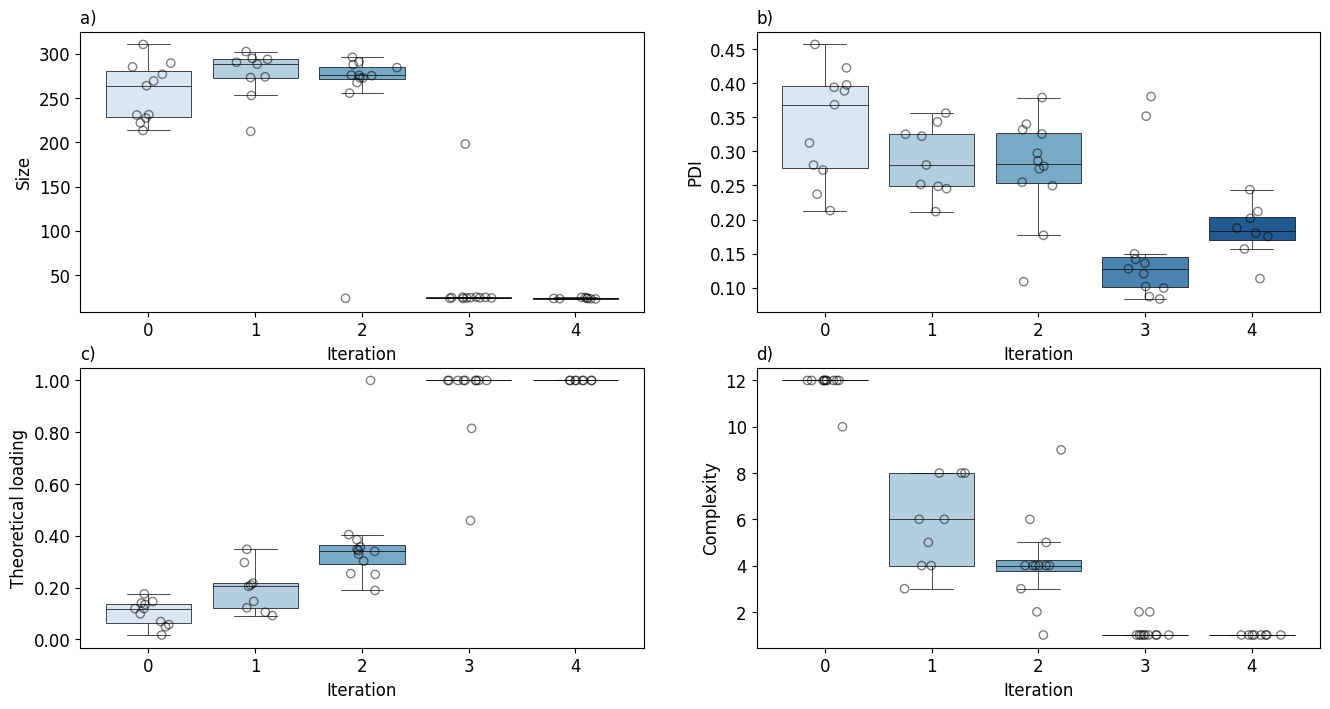

In [10]:
# plot optimization process as boxplots (formulation quality = 1)

fig = plt.figure(figsize=(16, 8))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)

data_to_plot = data_1.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Size', ax1, 'a)')

ax2 = fig.add_subplot(grid[0, 1])
boxplot(data_to_plot, 'PDI', ax2, 'b)')

ax3 = fig.add_subplot(grid[1, 0])
boxplot(data_to_plot, 'Theoretical loading', ax3, 'c)')

ax4 = fig.add_subplot(grid[1, 1])
boxplot(data_to_plot, 'Complexity', ax4, 'd)')

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Boxplot.png', dpi=600)
plt.show()


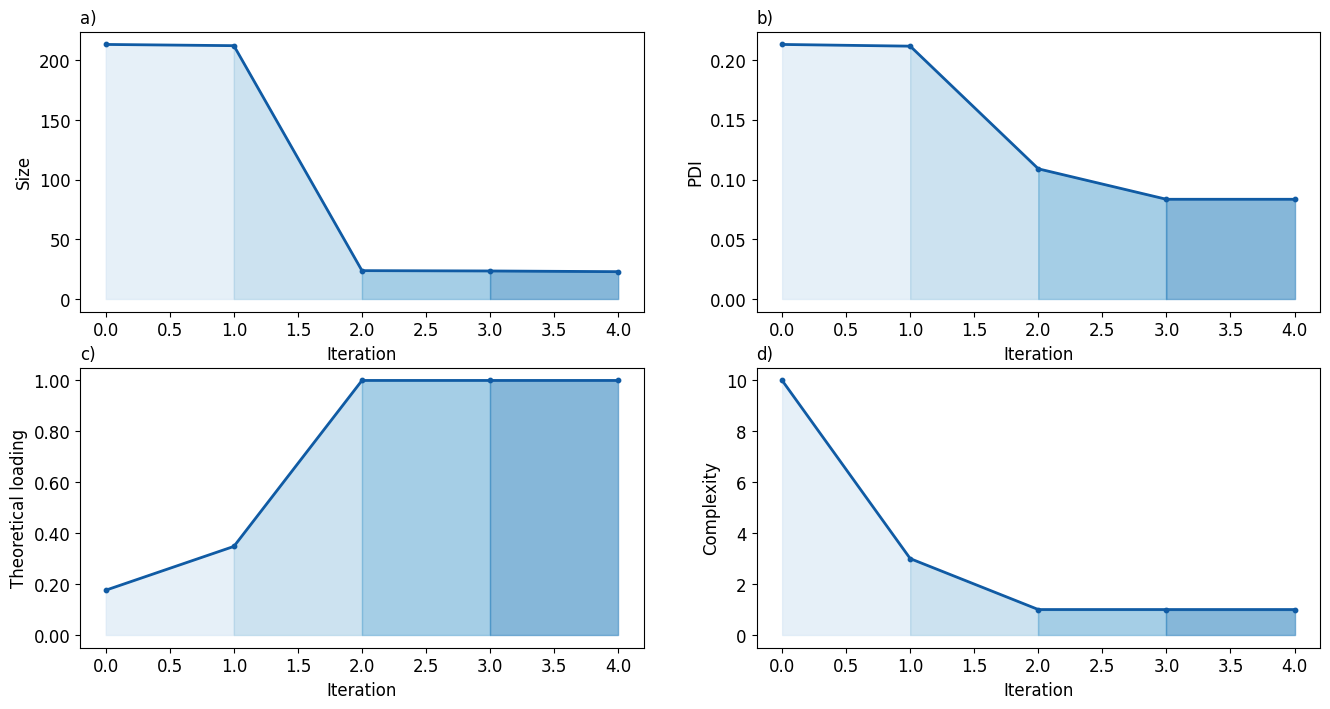

In [11]:
fig = plt.figure(figsize=(16, 8))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)

data_to_plot = data_1.copy()

ax1 = fig.add_subplot(grid[0, 0])
traceplot(data_to_plot, 'Size', ax1, 'a)', minimize=True)

ax2 = fig.add_subplot(grid[0, 1])
traceplot(data_to_plot, 'PDI', ax2, 'b)', minimize=True)

ax3 = fig.add_subplot(grid[1, 0])
traceplot(data_to_plot, 'Theoretical loading', ax3, 'c)', minimize=False)  # maximize here

ax4 = fig.add_subplot(grid[1, 1])
traceplot(data_to_plot, 'Complexity', ax4, 'd)', minimize=True)

fig.patch.set(facecolor='none')
fig.savefig('Traceplot.png', dpi=600, transparent=True)
plt.show()


/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

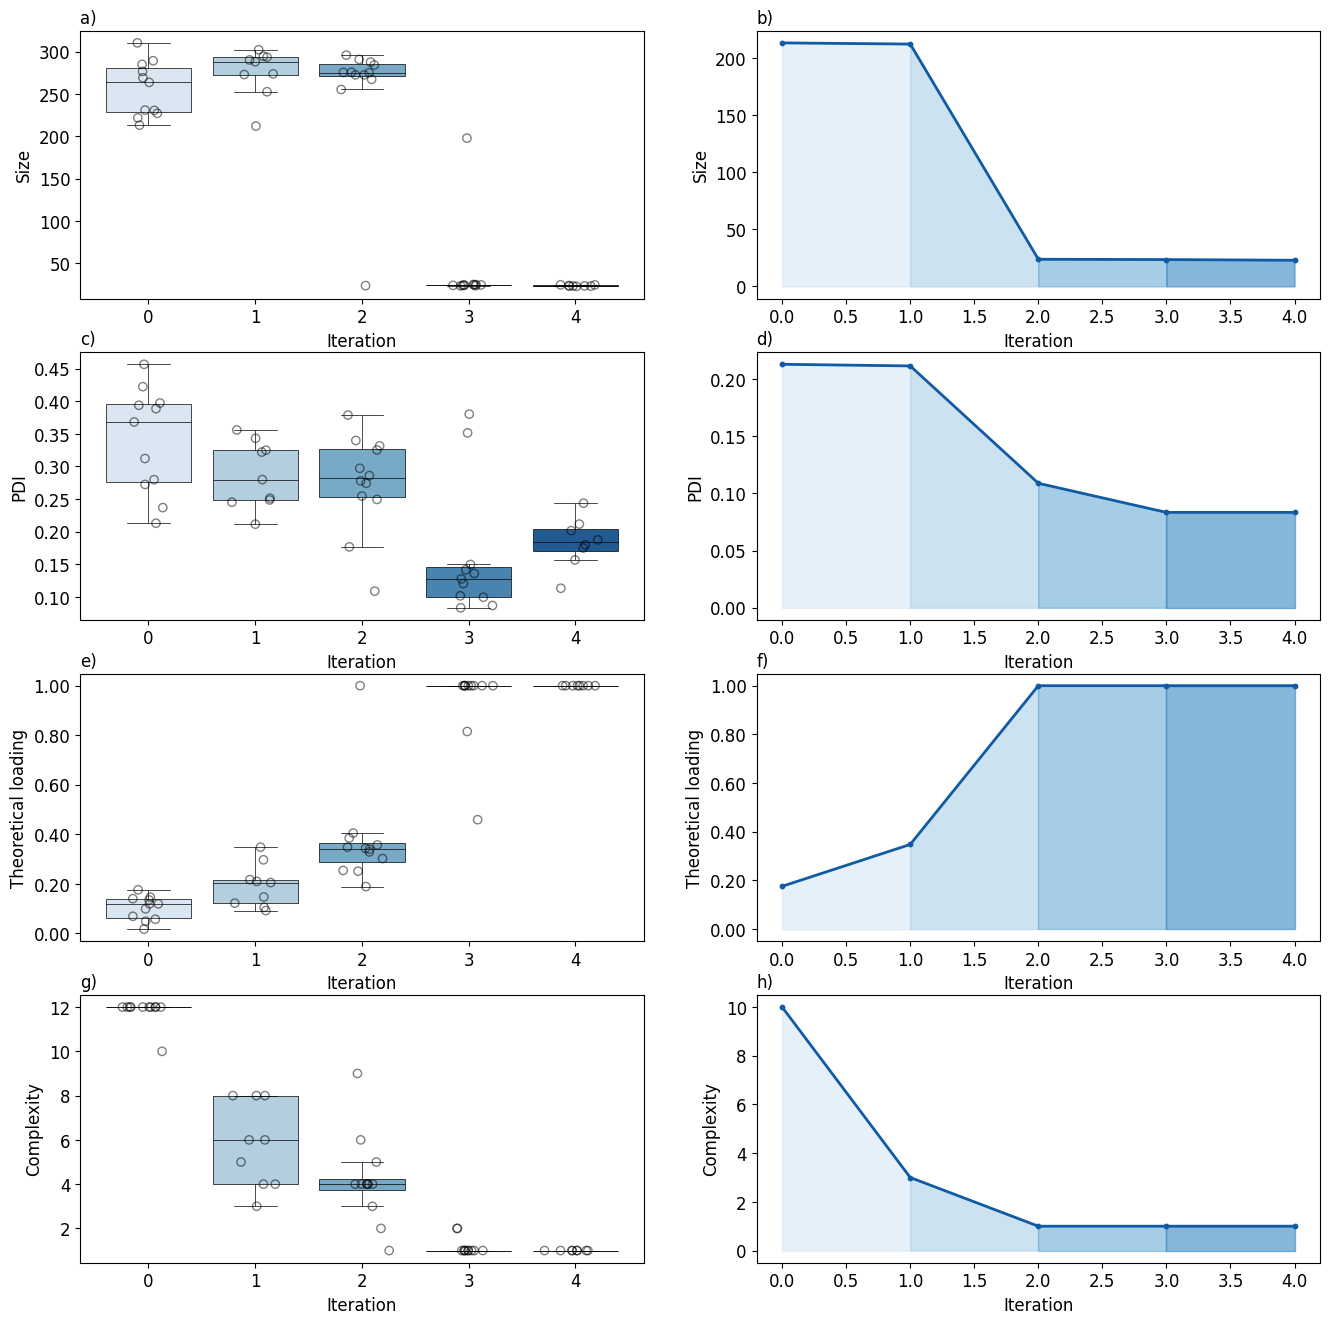

In [12]:
fig = plt.figure(figsize=(16, 16))
grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.2)

data_to_plot = data_1.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Size', ax1, 'a)')

ax2 = fig.add_subplot(grid[1, 0])
boxplot(data_to_plot, 'PDI', ax2, 'c)')

ax3 = fig.add_subplot(grid[2, 0])
boxplot(data_to_plot, 'Theoretical loading', ax3, 'e)')

ax4 = fig.add_subplot(grid[3, 0])
boxplot(data_to_plot, 'Complexity', ax4, 'g)')

ax5 = fig.add_subplot(grid[0, 1])
traceplot(data_to_plot, 'Size', ax5, 'b)', minimize=True)

ax6 = fig.add_subplot(grid[1, 1])
traceplot(data_to_plot, 'PDI', ax6, 'd)', minimize=True)

ax7 = fig.add_subplot(grid[2, 1])
traceplot(data_to_plot, 'Theoretical loading', ax7, 'f)', minimize=False)  # maximize here

ax8 = fig.add_subplot(grid[3, 1])
traceplot(data_to_plot, 'Complexity', ax8, 'h)', minimize=True)

fig.patch.set(facecolor='none')
fig.savefig('Figure_2.png', dpi=600, transparent=True)
plt.show()


/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

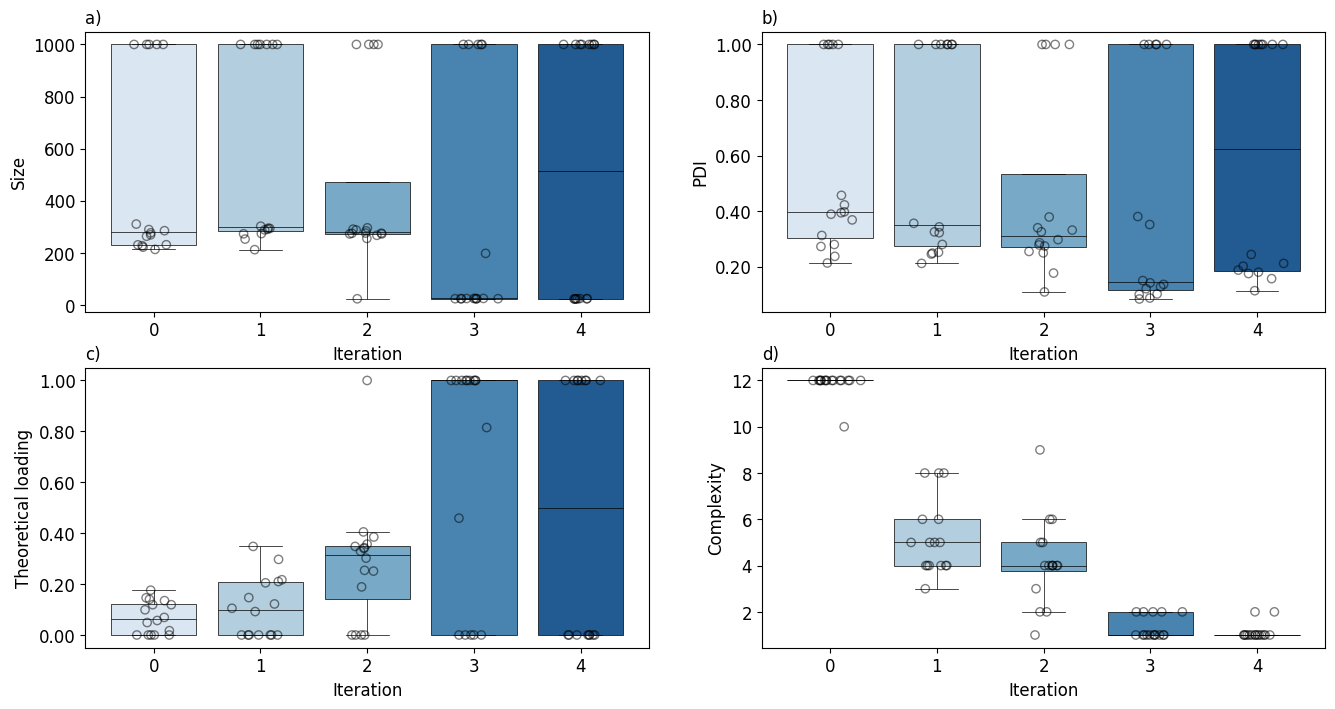

In [13]:
# plot optimization process as boxplots (all data)

fig = plt.figure(figsize=(16, 8))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)

data_to_plot = data.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Size', ax1, 'a)')

ax2 = fig.add_subplot(grid[0, 1])
boxplot(data_to_plot, 'PDI', ax2, 'b)')

ax3 = fig.add_subplot(grid[1, 0])
boxplot(data_to_plot, 'Theoretical loading', ax3, 'c)')

ax4 = fig.add_subplot(grid[1, 1])
boxplot(data_to_plot, 'Complexity', ax4, 'd)')

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Figure_S1.png', dpi=600)
plt.show()


In [14]:
# define performance metrics and data for heatmap

performance = ['Size', 'Size_STD', 'PDI', 'PDI_STD', 'Theoretical loading', 'Complexity']
data_HM = data[['Drug', 'SL_1', 'SL_2', 'SL_3', 'LL_1', 'LL_2', 'LL_3', 'P_1', 'P_2', 'P_3','S_1', 'S_2', 'S_3', 'Hypervolume'] + performance]

In [15]:
# Create heatmap plot

def heatmap(data_ML, ax, ann):

    # Rank formulations based on Hypervolume in descending order
    n = 10
    
    data_ML_sorted = data_ML.sort_values(by="Hypervolume", ascending=False)
    hypervolume_values = data_ML_sorted["Hypervolume"].head(n).values  
    data_ML_sorted = data_ML_sorted.drop(['Hypervolume'], axis=1)
    
    top_n = data_ML_sorted.head(n)
    top_n = top_n.drop(performance, axis=1)
    
    # Extract only excipient columns
    excipient_data = top_n.iloc[:, 1:]
    
    # Modify colormap for better contrast
    base_cmap = cm.get_cmap("Blues")
    new_cmap = mcolors.ListedColormap(base_cmap(np.linspace(0.2, 1, 256)))
    norm = mcolors.Normalize(vmin=0, vmax=1)
    
    # Generate heatmap
    sns.heatmap(excipient_data, cmap=new_cmap, norm=norm, cbar=True, linewidths=0.5, linecolor="white",
                 xticklabels=True, yticklabels=True, ax=ax)
    
    # Adjust axis labels and formatting
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    fontsize = 14
    ax.set_xlabel("")
    ax.set_ylabel(f"Top {n} Formulations", fontsize=fontsize)
    ax.set_title("", fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    ax.annotate(ann, xy=(0, 1.08), xycoords="axes fraction", va="top", ha="left", fontsize=fontsize)



/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/520780491.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Mat

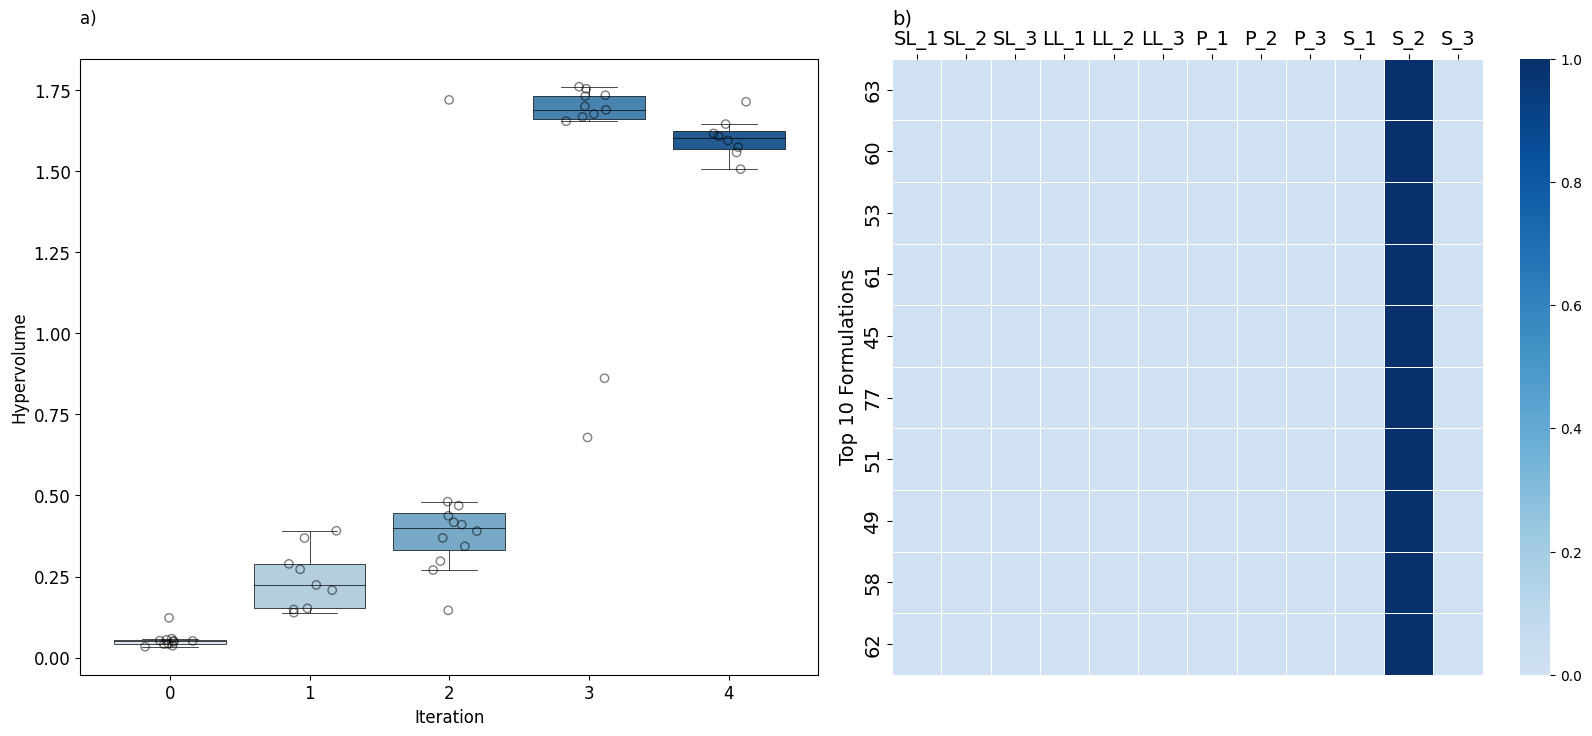

In [16]:
# Hypervolume plt (formulation quality = 1)

fig = plt.figure(figsize=(20, 8))
grid = plt.GridSpec(1, 2, wspace=0.1, hspace=0.0)

data_to_plot = data_1.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Hypervolume', ax1, 'a)')

ax2 = fig.add_subplot(grid[0, 1])
heatmap(data_HM, ax2, 'b)')

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Figure_3.png', dpi=600)
plt.show()

/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/3350201344.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_27234/520780491.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Mat

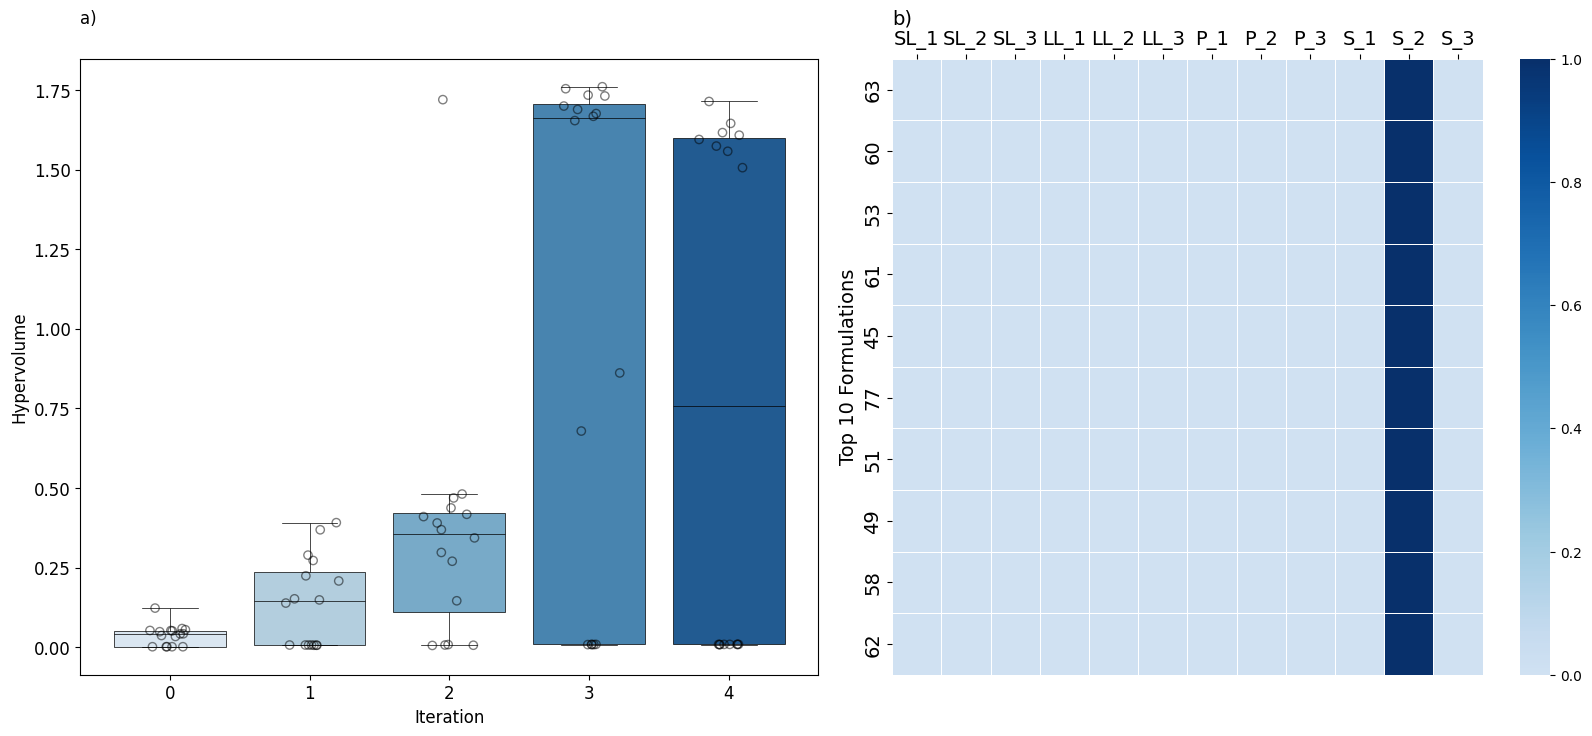

In [17]:
# Hypervolume plt (all data)


fig = plt.figure(figsize=(20, 8))
grid = plt.GridSpec(1, 2, wspace=0.1, hspace=0.0)

data_to_plot = data.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Hypervolume', ax1, 'a)')

ax2 = fig.add_subplot(grid[0, 1])
heatmap(data_HM, ax2, 'b)')

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Figure_S2.png', dpi=600)
plt.show()

In [18]:
# Filter top 10 formulations based on Hypervolume

top_10 = data_HM.sort_values(by="Hypervolume", ascending=False).head(10)

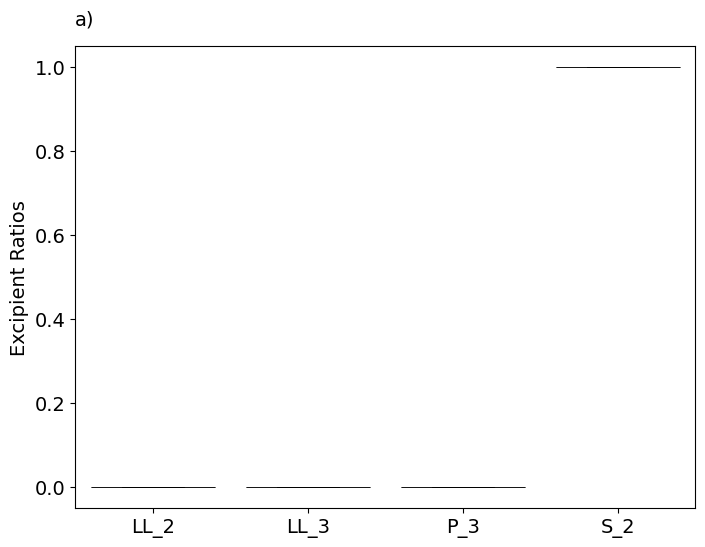

In [19]:
# Plot the excipient preferences for the top-performing formulations

fig, ax = plt.subplots(figsize=(8, 6))


blues_palette = sns.color_palette("Blues", 4)  # Adjust the number to get enough shades


sns.boxplot(
    data = top_10[['LL_2', 'LL_3', 'P_3', 'S_2']],
    color=blues_palette[2],
    linewidth=0.5,  # Set border width
    boxprops={'edgecolor': 'black'},  # Set border color
    whiskerprops={'color': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'},
    showfliers=True,  # Hide outlier circles
    ax=ax
)

fontsize = 14
#ax.set_xlabel("")
ax.set_ylabel("Excipient Ratios", fontsize=fontsize)
ax.set_title("", fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

ax.annotate("a)", xy=(0, 1.08), xycoords="axes fraction", va="top", ha="left", fontsize=fontsize)

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Figure_4a.png', dpi=600)